this code is about the classification of the chest CT images into one of the four cancerous conditions namely adenocarcinoma, large cell carcinoma, squamous cell carcinoma and normal.

In [1]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
import scipy

In [2]:
path = './../10-617 Project Data/'

In [15]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [4]:
train_generator = train_datagen.flow_from_directory(
    f'{path}/Data/train',
    target_size = (224,224),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')
    
validation_generator = val_datagen.flow_from_directory(
    f'{path}/Data/valid',
    target_size = (224,224),
    batch_size = 1,
    shuffle=True,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    f'{path}/Data/test',
    target_size = (224,224),
    batch_size = 1,
    shuffle=True,
    class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


I have developed a transfer learning based EfficientNetB3 model that has been trained on imagenet dataset. I have added some additional layers to the basic model.

In [13]:
base_model = EfficientNetB0(weights='imagenet', classifier_activation="softmax", include_top=False)

print(len(base_model.layers))
for layer in base_model.layers:
    layer.trainable=True
model = Sequential()
model.add(base_model)
model.add(GlobalMaxPooling2D(name="gap"))
model.add(Dense(4, activation='softmax'))
model.summary()


model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy','AUC','Precision','Recall'])

238
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 4,054,695
Trainable params: 4,012,672
Non-trainable params: 42,023
_________________________________________________________________


In [10]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

In [14]:

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    )

Epoch 1/30
20/20 [==============================] - 36s 2s/step - loss: 4.7475 - accuracy: 0.2594 - auc: 0.5082 - precision: 0.2596 - recall: 0.2529 - val_loss: 3.4324 - val_accuracy: 0.2639 - val_auc: 0.5478 - val_precision: 0.2687 - val_recall: 0.2500
Epoch 2/30
20/20 [==============================] - 30s 1s/step - loss: 4.0464 - accuracy: 0.2822 - auc: 0.5302 - precision: 0.2840 - recall: 0.2724 - val_loss: 3.3739 - val_accuracy: 0.2778 - val_auc: 0.5358 - val_precision: 0.2537 - val_recall: 0.2361
Epoch 3/30
20/20 [==============================] - 29s 1s/step - loss: 2.9492 - accuracy: 0.3230 - auc: 0.6026 - precision: 0.3241 - recall: 0.3067 - val_loss: 2.9361 - val_accuracy: 0.3056 - val_auc: 0.5944 - val_precision: 0.3333 - val_recall: 0.3056
Epoch 4/30
20/20 [==============================] - 29s 1s/step - loss: 2.5455 - accuracy: 0.3589 - auc: 0.6354 - precision: 0.3606 - recall: 0.3377 - val_loss: 2.7758 - val_accuracy: 0.2917 - val_auc: 0.5933 - val_precision: 0.2969 - val

In [16]:
print(history.history.keys())
h = history.history
print(h['val_accuracy'])

dict_keys(['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall'])
[0.2638888955116272, 0.2777777910232544, 0.3055555522441864, 0.2916666567325592, 0.3472222089767456, 0.3333333432674408, 0.4722222089767456, 0.3611111044883728, 0.4166666567325592, 0.4583333432674408, 0.5138888955116272, 0.4027777910232544, 0.4722222089767456, 0.4166666567325592, 0.4583333432674408, 0.375, 0.4583333432674408, 0.4722222089767456, 0.375, 0.4861111044883728, 0.5, 0.5277777910232544, 0.5555555820465088, 0.4444444477558136, 0.5416666865348816, 0.4305555522441864, 0.5277777910232544, 0.5555555820465088, 0.4722222089767456, 0.5]


['loss', 'accuracy', 'auc', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc', 'val_precision', 'val_recall']
loss loss val_loss


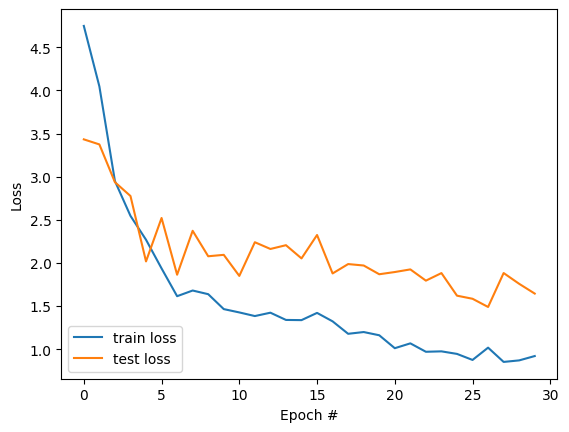

accuracy accuracy val_accuracy


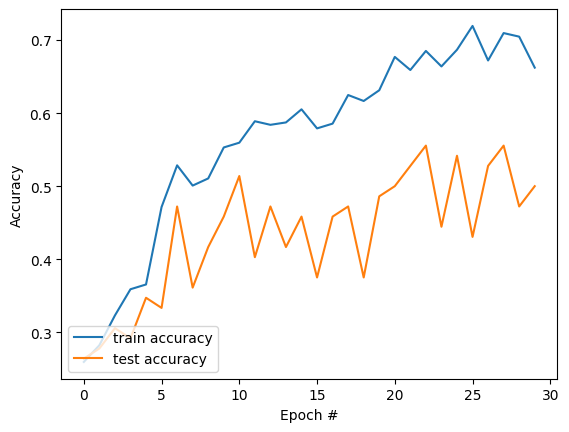

precision auc val_auc


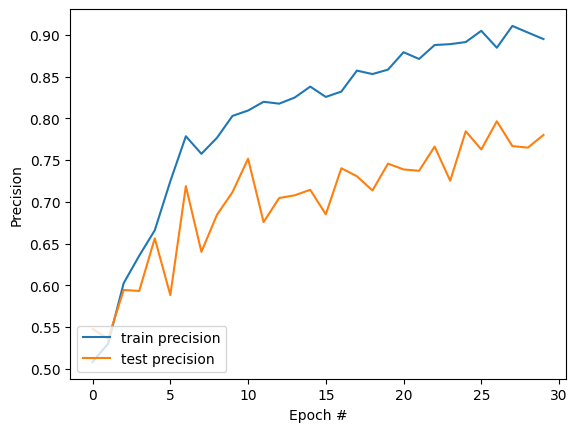

recall recall val_recall


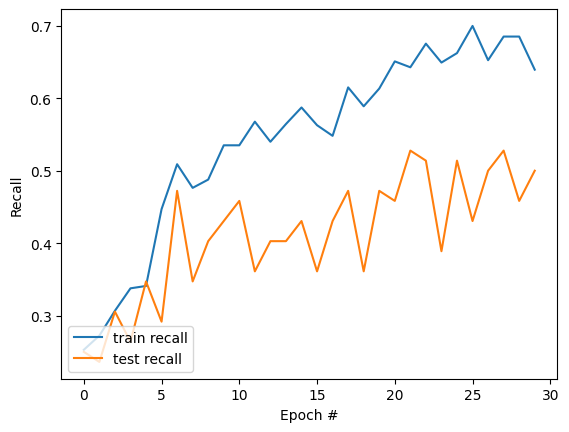

<Figure size 640x480 with 0 Axes>

In [17]:
hdict = history.history
keys = list(hdict.keys())
print(keys)
def graph(name, index):
    print(name, keys[index], keys[(len(keys) // 2) + index])
    train_metric, test_metric = hdict[keys[index]], hdict[keys[(len(keys) // 2) + index]]
    epochs = len(train_metric)
    x = list(range(epochs))

    plt.plot(x, train_metric, label=f'train {name}')
    plt.plot(x, test_metric, label=f'test {name}')

    plt.xlabel('Epoch #')
    plt.ylabel(name.capitalize())
    plt.legend(loc='lower left')
    plt.savefig(f'./initial_plots/{name}.png')
    plt.show()
    plt.clf()

graph('loss', 0)
graph('accuracy', 1)
graph('precision', 2)
graph('recall', 4)

In [18]:
model.evaluate(train_generator)

20/20 [==============================] - 7s 348ms/step - loss: 1.0524 - accuracy: 0.6607 - auc: 0.8761 - precision: 0.6776 - recall: 0.6378


[1.0524094104766846,
 0.6606851816177368,
 0.8760848045349121,
 0.6776430010795593,
 0.6378466486930847]

In [29]:
model.evaluate(validation_generator)


72/72 [==============================] - 2s 27ms/step - loss: 1.7424 - accuracy: 0.4861 - auc: 0.7656 - precision: 0.4928 - recall: 0.4722


[1.7424075603485107,
 0.4861111044883728,
 0.7655607461929321,
 0.49275362491607666,
 0.4722222089767456]

In [25]:
model.evaluate(test_generator)
# loss, 'accuracy','AUC','Precision','Recall'

315/315 [==============================] - 8s 25ms/step - loss: 1.8878 - accuracy: 0.4635 - auc: 0.7279 - precision: 0.4878 - recall: 0.4444


[1.887800693511963,
 0.4634920656681061,
 0.7278541922569275,
 0.4878048896789551,
 0.4444444477558136]

In [ ]:
# from keras.preprocessing import image
# img = image.load_img('/content/Data/valid/squamous_cell_carcinoma_left.lower.lobe_T2_N0_M0_Ib/000117 (6).png',target_size=(224,224))
# imag = image.img_to_array(img)
# imaga = np.expand_dims(imag,axis=0) 
# ypred = model.predict(imaga)
# print(ypred)
# a=np.argmax(ypred,-1)
# if a==0:
#   op="Adenocarcinoma"
# elif a==1:
#   op="large cell carcinoma"
# elif a==2:
#   op="normal (void of cancer)"
# else:
#   op="squamous cell carcinoma"    
# plt.imshow(img)
# print("THE UPLOADED IMAGE IS SUSPECTED AS: "+str(op))  


In [ ]:
tf.keras.models.save_model(model,'mymodel.hdf5')